# Лабораторная работа №4   
Задание:
Используя схемы переменных направлений и дробных шагов, решить двумерную начально-краевую задачу для дифференциального уравнения параболического типа. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x, y, t)$. Исследовать зависимость погрешности от сеточных параметров $\tau, h_{x}, h_{y}$.   
Дифференциальное уравнение:   
$\frac{\partial u}{\partial t}=\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}-x y \sin$,   
$u(0, y, t)=0$,   
$u(1, y, t)=y \cos t$,   
$u(x, 0, t)=0$,   
$u(x, 1, t)=x \cos t$,   
$u(x, y, 0)=x y$.   
Аналитическое решение: $U(x, y, t)=x y \cos t$.

In [1]:
from main import *

In [2]:
firstMethod = True
nx, ny, T, K = 40, 40, 5, 100
plottingTime = 2

In [3]:
args = {
    'a': 1,
    'b': 1,
    'c': 0,
    'd': 0,
    'dx': 1,
    'dy': 1,
    'Function': lambda x, y, t: - x * y * np.sin(t),
    'alpha1': 0,
    'alpha2': 1,
    'beta1': 0,
    'beta2': 1,
    'gamma1': 0,
    'gamma2': 1,
    'delta1': 0,
    'delta2': 1,
    'Phi11': lambda y, t: 0,
    'Phi12': lambda y, t: y * np.cos(t),
    'Phi21': lambda x, t: 0,
    'Phi22': lambda x, t: x * np.cos(t),
    'Psi': lambda x, y: x * y,
    'AnaliticalSolution': lambda x, y, t: x * y * np.cos(t),
    'algorithm' : 'VariableDirections' if firstMethod else 'FractionalSteps'
}

In [4]:
solver = ParabolicSolver(args)
numericalAnswer = solver.Solve(nx, ny, T, K),
analyticAnswer = solver.AnalyticSolve(nx, ny, T, K)

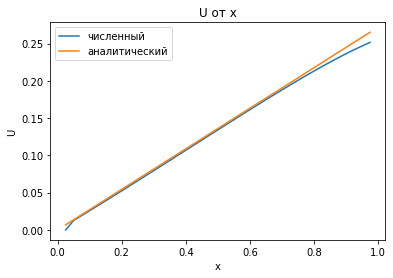

100%|██████████| 20/20 [02:07<00:00,  6.38s/it]
No handles with labels found to put in legend.


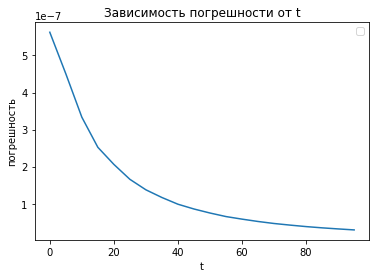

No handles with labels found to put in legend.


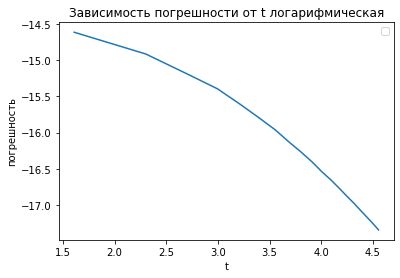

No handles with labels found to put in legend.


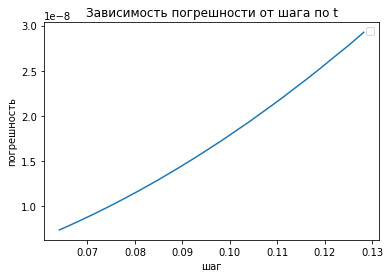

No handles with labels found to put in legend.


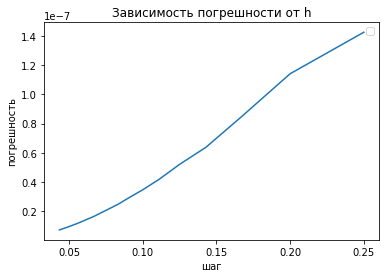

No handles with labels found to put in legend.


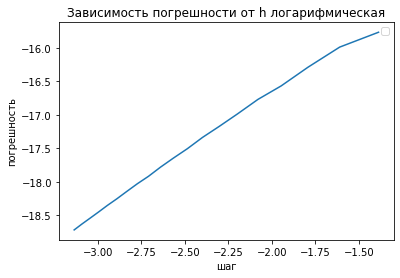

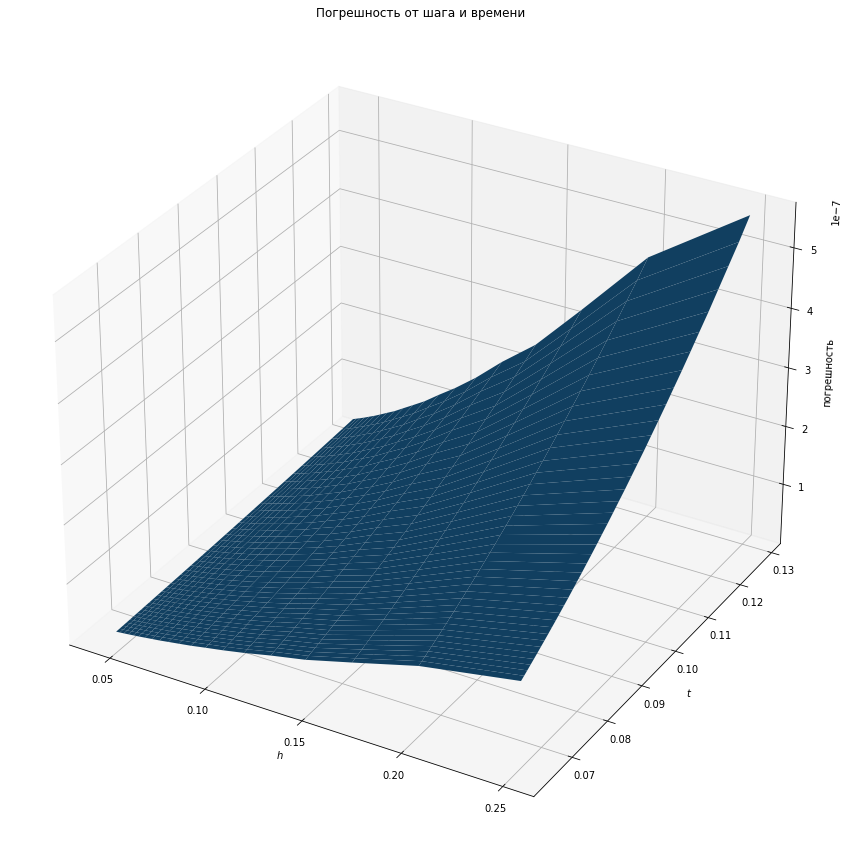

In [5]:
def DrawCharts(numericalAnswer, analyticAnswer, nx, ny, T, K, time):
    fig = plt.figure()
    hx = 1 / nx
    hy = 1 / ny
    tau = T / K
    
    x = np.arange(hx, 1, hx)
    y = np.arange(hy, 1, hy)
    t = np.arange(tau, T, tau)

    
    z1 = PrepareNumerical(x, 10, time, numericalAnswer)
    z2 = PrepareAnalitic(x, y[10], t[time], analyticAnswer)

    plt.title('U от x')
    plt.plot(x, z1[time], label='численный')
    plt.plot(x, z2, label='аналитический')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('x')
    plt.show()
    
    '''z1 = PrepareNumerical(y, 10, time, numericalAnswer)
    z2 = PrepareAnalitic(y,x[10], t[time], analyticAnswer)
    
    plt.title('U от y')
    plt.plot(x, z1[time], label='численный')
    plt.plot(x, z2, label='аналитический')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('y')
    plt.show()
    
    fig = plt.figure()
    plt.title('Зависимость погрешности от длины шага')
    plt.plot(e1[:16], h1, label='Дробные шаги')
    plt.plot(e2[:16], h2, label='Переменные направления')
    plt.legend(loc='best')
    plt.ylabel('шаг')
    plt.xlabel('погрешность')
    plt.show()'''
    
    solv = Schema(T=T, order2nd=firstMethod)
    h = []
    tau = []
    eps = []
    for i in tqdm(range(20)):
        h.append([])
        tau.append([])
        eps.append([])
        for j in range(40):
            N = i + 5
            K = j + 40
            X, Y, T, Z = solv(N, N, K)
            h[-1].append(solv.hx)
            tau[-1].append(solv.tau)
            eps[-1].append(FullError(X, Y, T, Z))
    
    t = range(0, 100, 5)
    err = [max(m) for m in eps]
    fig = plt.figure()
    plt.title('Зависимость погрешности от t')
    plt.plot(t, err)
    plt.legend(loc='best')
    plt.ylabel('погрешность')
    plt.xlabel('t')
    plt.show()
    
    fig = plt.figure()
    plt.title('Зависимость погрешности от t логарифмическая')
    plt.plot(np.log(t), np.log(err))
    plt.legend(loc='best')
    plt.ylabel('погрешность')
    plt.xlabel('t')
    plt.show()
    
    fig = plt.figure()
    plt.title('Зависимость погрешности от шага по t')
    plt.plot(tau[-1], eps[-1])
    plt.legend(loc='best')
    plt.ylabel('погрешность')
    plt.xlabel('шаг')
    plt.show()
    
    ee = [eps[i][-1] for i in range(len(eps))]
    hh = [h[i][-1] for i in range(len(h))]

    fig = plt.figure()
    plt.title('Зависимость погрешности от h')
    plt.plot(hh, ee)
    plt.legend(loc='best')
    plt.ylabel('погрешность')
    plt.xlabel('шаг')
    plt.show()
    
    fig = plt.figure()
    plt.title('Зависимость погрешности от h логарифмическая')
    plt.plot(np.log(hh), np.log(ee))
    plt.legend(loc='best')
    plt.ylabel('погрешность')
    plt.xlabel('шаг')
    plt.show()
    
    fig = plt.figure(num=1, figsize=(19, 12), clear=True)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(np.array(h), np.array(tau), np.array(eps))
    ax.set(xlabel='$h$', ylabel='$t$', zlabel='погрешность', title='Погрешность от шага и времени')
    fig.tight_layout()
    return (np.array(h), np.array(tau), np.array(eps))
    
h, tau, eps = DrawCharts(numericalAnswer, analyticAnswer, nx, ny, T, K, plottingTime)

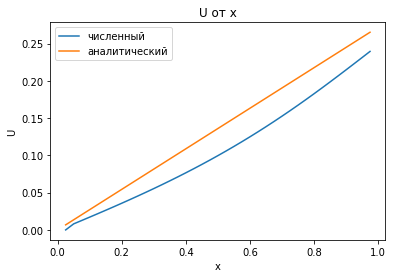

100%|██████████| 20/20 [02:32<00:00,  7.62s/it]
No handles with labels found to put in legend.


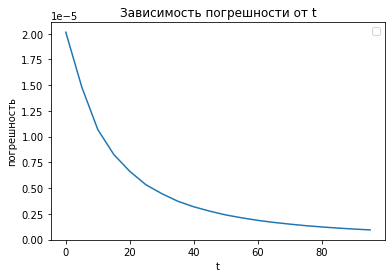

No handles with labels found to put in legend.


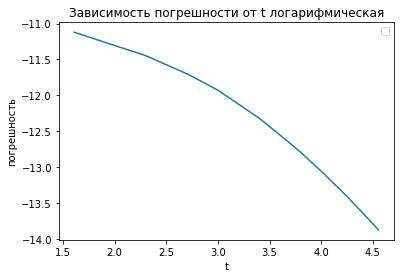

No handles with labels found to put in legend.


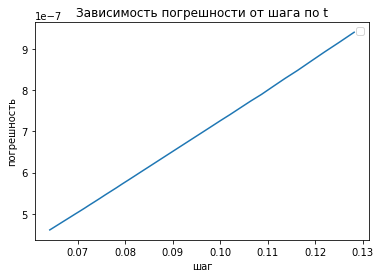

No handles with labels found to put in legend.


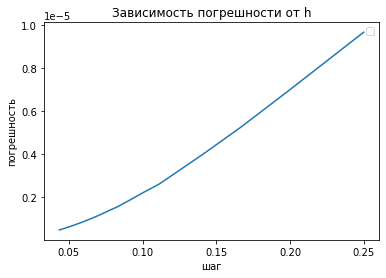

No handles with labels found to put in legend.


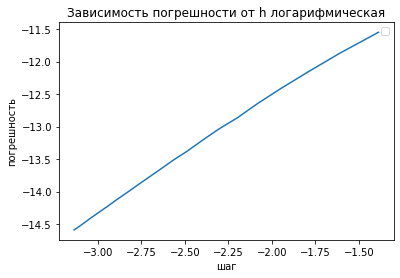

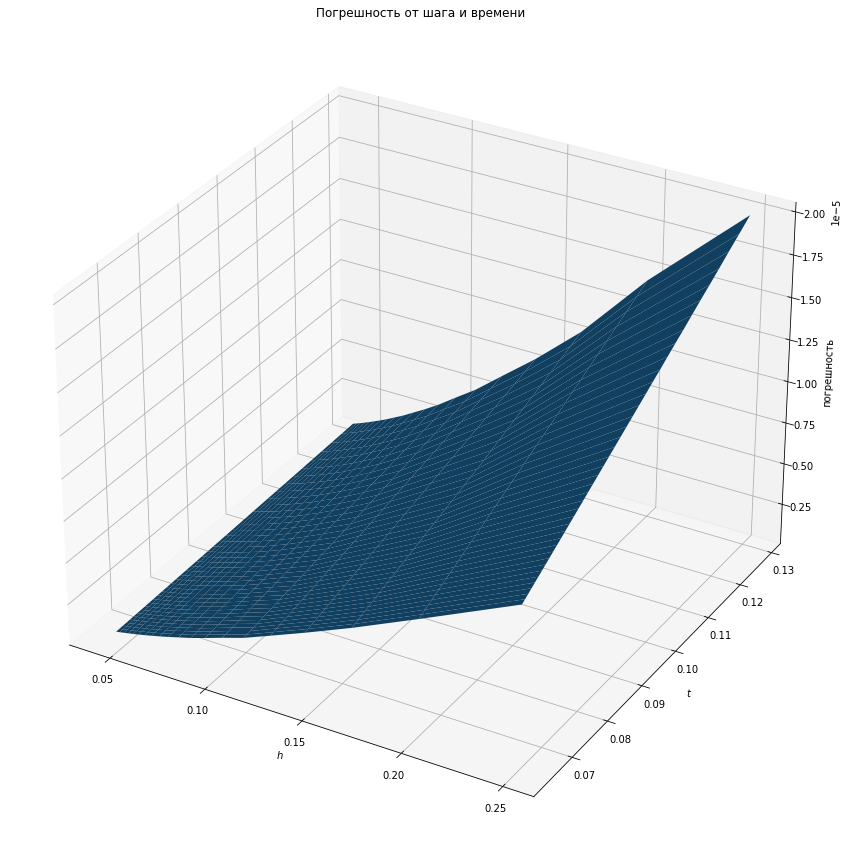

In [6]:
firstMethod = False
args['algorithm'] = 'FractionalSteps'
solver = ParabolicSolver(args)
numericalAnswer = solver.Solve(nx, ny, T, K),
analyticAnswer = solver.AnalyticSolve(nx, ny, T, K)

h1, tau1, eps1 = DrawCharts(numericalAnswer, analyticAnswer, nx, ny, T, K, plottingTime)

### Анализ порядка сходимости алгоритма.

#### Переменные направления

Порядок по времени получился равным примерно 1.8.  
А порядок по пространству -- 2.35. Он не должен превышать 2, но мы спишем это на погрешность в поределении порядка.   

#### Дробные шаги

В этом методе всё получилось вообще замечательно.   
Порядок по времени = 1.   
А по пространству = 2.   
Всё как по учебнику. Тут мы конечно забудем про погрешности и скажем, что код идеален!